# Covid-19 Deathtoll:Top20 countries

Our goal is to make readers more aware of how devastating this virus is because many people are tired of wearing masks, physical distancing, being away from family and friends, and increasingly fed up with the “new normal” routines.

The virus has spread rapidly these days due to the delta variance again and people still need to be careful of it.
(The data was collected from Worldometer on August 28, 2021)

I want to make readers more aware that people are dying because of this virus so I will include a graph in the article that shows the top 20 countries by the number of deaths.


In [458]:
import pandas as pd
df = pd.read_csv('covid19_08282021.csv')
df.head()
df.tail()

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M pop,Deaths_1M pop,Total_Tests,Tests_1M pop,Population
219,Samoa,3,NaN,NaN,NaN,3,NaN,0,NaN,15,NaN,NaN,NaN,"199,934"
220,Palau,2,NaN,NaN,NaN,NaN,NaN,2,NaN,110,NaN,"8,221","451,877","18,193"
221,Saint Helena,2,NaN,NaN,NaN,2,NaN,0,NaN,328,NaN,NaN,NaN,"6,098"
222,Micronesia,1,NaN,NaN,NaN,1,NaN,0,NaN,9,NaN,NaN,NaN,"116,413"
223,World,"216,532,043","367,879","4,504,232","6,466","193,512,685","362,238","18,515,126","112,908","27,779",577.9,NaN,NaN,NaN


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country_Other     224 non-null    object
 1   Total_Cases       224 non-null    object
 2   New_Cases         106 non-null    object
 3   Total_Deaths      211 non-null    object
 4   New_Deaths        79 non-null     object
 5   Total_Recovered   222 non-null    object
 6   New_Recovered     91 non-null     object
 7   Active_Cases      223 non-null    object
 8   Serious_Critical  155 non-null    object
 9   Tot_Cases_1M pop  222 non-null    object
 10  Deaths_1M pop     209 non-null    object
 11  Total_Tests       211 non-null    object
 12  Tests_1M pop      211 non-null    object
 13  Population        221 non-null    object
dtypes: object(14)
memory usage: 24.6+ KB


## Data Preprocessing

In [460]:
df['Total_Deaths'] = df['Total_Deaths'].str.replace(",", "")
df['Total_Deaths'].astype(float)

0       653433.0
1       437687.0
2       578396.0
3       180840.0
4       114157.0
         ...    
219          NaN
220          NaN
221          NaN
222          NaN
223    4504232.0
Name: Total_Deaths, Length: 224, dtype: float64

In [461]:
deathtoll = df[["Country_Other","Total_Deaths"]]
deathtoll.Total_Deaths = pd.to_numeric(deathtoll.Total_Deaths, errors='coerce')
deathtoll.sort_values(by='Total_Deaths', ascending=False, inplace=True)

C:\Users\newbm\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-461-870c655ba71d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deathtoll.sort_values(by='Total_Deaths', ascending=False, inplace=True)


In [462]:
deathtoll_20 = deathtoll.iloc[1:21]
deathtoll_20.reset_index(drop=True, inplace=True)
deathtoll_20

,Country_Other,Total_Deaths
0,USA,653433.0
1,Brazil,578396.0
2,India,437687.0
3,Mexico,257150.0
4,Peru,198115.0
5,Russia,180840.0
6,UK,132376.0
7,Indonesia,131372.0
8,Italy,129056.0
9,Colombia,124648.0


## Data Visualization

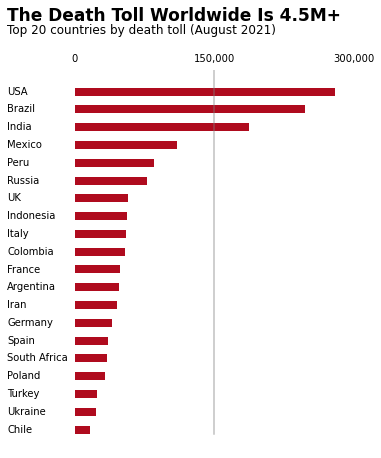

In [463]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,7))

ax.barh(deathtoll_20["Country_Other"], deathtoll_20["Total_Deaths"]
       , height=0.45, color='#af0b1e')
plt.gca().invert_yaxis()

#To maximize data ink, we can remove the axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

# we can make the bars less thick and remove some of the x-tick labels
ax.set_xticks([0, 350000, 700000])
ax.xaxis.tick_top()

# To maximize data ink, we can remove the ticks
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', color='grey')

ax.text(x=-170000, y=-4.0, s="The Death Toll Worldwide Is 4.5M+", size=17, weight='bold')
ax.text(x=-170000, y=-3.3, s='Top 20 countries by death toll (August 2021)', size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels
country_names = deathtoll_20['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-170000, y=i+0.13, s=country)

# we're going to draw a vertical line below the 350,000 value to help readers determine the approximate death toll.    
ax.axvline(x=350000, ymin=0.045, c='grey', alpha=0.5)
    
plt.show()

# United States COVID-19 Deaths over time

We'll draw the five line plots that show the evolution of average daily deaths per month in 2020 and 2021.

In [464]:
d = pd.read_csv("United_States_COVID-19.csv")
d.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,1/22/2020,GA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
1,1/22/2020,OK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Agree
2,1/22/2020,MP,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
3,1/22/2020,NYC,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
4,1/22/2020,WV,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Not agree


In [465]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  35040 non-null  object 
 1   state            35040 non-null  object 
 2   tot_cases        35040 non-null  int64  
 3   conf_cases       17592 non-null  float64
 4   prob_cases       17521 non-null  float64
 5   new_case         35040 non-null  int64  
 6   pnew_case        30850 non-null  float64
 7   tot_death        35040 non-null  int64  
 8   conf_death       18063 non-null  float64
 9   prob_death       18063 non-null  float64
 10  new_death        35040 non-null  int64  
 11  pnew_death       30790 non-null  float64
 12  created_at       35040 non-null  object 
 13  consent_cases    28616 non-null  object 
 14  consent_deaths   29784 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 4.0+ MB


## Data Preprocessing

In [466]:
# Since the data is divided by state, we sum up the data by date
d_copy = d.copy().groupby("submission_date", as_index=False).sum()
d_copy.head()

,submission_date,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,1/1/2021,20706815,11755243.0,1126414.0,216655,27854.0,374970,226895.0,22504.0,3181,197.0
1,1/10/2021,22867626,13502718.0,1379530.0,207804,23592.0,405153,244766.0,24495.0,2805,270.0
2,1/11/2021,23058493,13617227.0,1395293.0,190867,24037.0,408182,246528.0,24675.0,3029,309.0
3,1/12/2021,23268237,13726322.0,1418268.0,209744,35368.0,412282,248938.0,24959.0,4100,572.0
4,1/13/2021,23508812,13865352.0,1443764.0,240575,38550.0,416451,251239.0,25245.0,4169,168.0


In [467]:
# The average daily death
d_copy["new_death"].mean()

1073.820205479452

In [468]:
d_copy["submission_date"] = pd.to_datetime(d_copy["submission_date"])
d_copy["year-month"] = d_copy["submission_date"].dt.strftime('%Y-%m')
d_copy.head()

,submission_date,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,year-month
0,2021-01-01,20706815,11755243.0,1126414.0,216655,27854.0,374970,226895.0,22504.0,3181,197.0,2021-01
1,2021-01-10,22867626,13502718.0,1379530.0,207804,23592.0,405153,244766.0,24495.0,2805,270.0,2021-01
2,2021-01-11,23058493,13617227.0,1395293.0,190867,24037.0,408182,246528.0,24675.0,3029,309.0,2021-01
3,2021-01-12,23268237,13726322.0,1418268.0,209744,35368.0,412282,248938.0,24959.0,4100,572.0,2021-01
4,2021-01-13,23508812,13865352.0,1443764.0,240575,38550.0,416451,251239.0,25245.0,4169,168.0,2021-01


In [469]:
month_mean = d_copy.groupby("year-month", as_index=False).mean()
tot_death = d_copy.groupby("year-month", as_index=False)["tot_death"].max()
avg_covid = month_mean[["year-month", "new_case", "new_death"]]
avg_covid = avg_covid.merge(tot_death, how='outer')
avg_covid

,year-month,new_case,new_death,tot_death
0,2020-01,5.100000,0.000000,0
1,2020-02,17.103448,0.137931,191
2,2020-03,7310.870968,165.774194,5330
3,2020-04,29357.033333,2027.266667,66148
4,2020-05,24275.967742,1355.516129,108169
5,2020-06,30668.266667,697.366667,130914
6,2020-07,63386.193548,1019.516129,162519
7,2020-08,45707.387097,993.451613,193316
8,2020-09,40459.000000,706.600000,214514
9,2020-10,62887.677419,769.193548,238359


In [470]:
avg_covid["year-month"] = pd.to_datetime(avg_covid["year-month"])

## Data Visualization

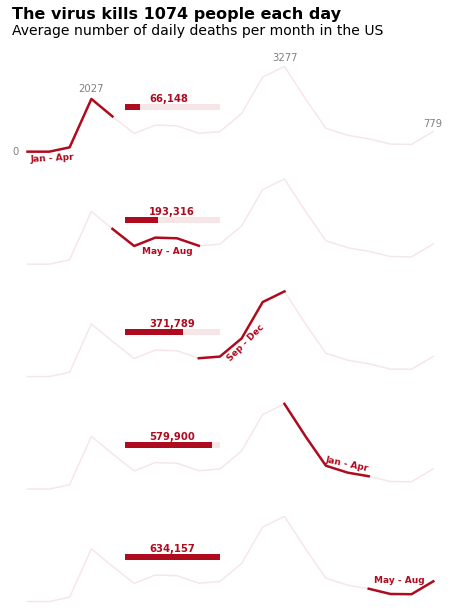

In [471]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(8,10))

axes = [ax1, ax2, ax3, ax4, ax5]
location = ['left', 'right', 'bottom', 'top']
for ax in axes:
    ax.plot(avg_covid["year-month"], avg_covid["new_death"], color='#af0b1e', alpha=0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    for loc in location:
        ax.spines[loc].set_visible(False)

        
ax1.plot(avg_covid["year-month"][:5], avg_covid["new_death"][:5], color='#af0b1e', linewidth=2.5)
ax1.text(18240, -120, '0', alpha=0.5)
ax1.text(18335, 2300, '2027', alpha=0.5)
ax1.text(18610, 3500, '3277', alpha=0.5)
ax1.text(18825, 950, '779', alpha=0.5)
ax1.text(18265, -400, 'Jan - Apr', color='#af0b1e',size=9, weight='bold', rotation=3)

# Title
ax1.text(18240, 5100, 'The virus kills 1074 people each day',
         size=16, weight='bold')
ax1.text(18240, 4500, 'Average number of daily deaths per month in the US',
         size=14)

ax2.plot(avg_covid["year-month"][4:9], avg_covid["new_death"][4:9], color='#af0b1e', linewidth=2.5)
ax2.text(18425, 400, 'May - Aug', color='#af0b1e',size=9, weight='bold', rotation=0)

ax3.plot(avg_covid["year-month"][8:13], avg_covid["new_death"][8:13], color='#af0b1e', linewidth=2.5)  
ax3.text(18544, 600, 'Sep - Dec', color='#af0b1e',size=9, weight='bold', rotation=45)

ax4.plot(avg_covid["year-month"][12:17], avg_covid["new_death"][12:17], color='#af0b1e', linewidth=2.5)  
ax4.text(18685, 700, 'Jan - Apr', color='#af0b1e',size=9, weight='bold', rotation=-12)

ax5.plot(avg_covid["year-month"][16:21], avg_covid["new_death"][16:21], color='#af0b1e', linewidth=2.5)  
ax5.text(18755, 700, 'May - Aug', color='#af0b1e',size=9, weight='bold', rotation=0)

deaths = [66148, 193316, 371789, 579900, 634157]
proportions = [round(death/634157, 2) for death in deaths]
xmax_vals = [round(0.27+proportion*0.2, 3) for proportion in proportions]


for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1700, xmin=0.27, xmax=0.47, linewidth=6, color='#af0b1e', alpha=0.1)
    ax.axhline(y=1700, xmin=0.27, xmax=xmax, linewidth=6, color='#af0b1e')
    ax.text(18435, 1900, format(death, ','), color='#af0b1e', weight='bold')

plt.show()

We can see that the death toll had decreased since December 2020 but it has increased again due to the Delta variance since August 2021.